# Notebook to demonstrate simple pyplot

$This~is~some~markdown~text~with~LaTeX.$


This is some **markdown** text with $LaTeX$.

In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [211]:
%%ignore
plt.rc('figure', figsize = [20, 6])
plt.rc('font', size = 16)

ERROR: Cell magic `%%ignore` not found.


In [212]:
x = np.linspace(0, 20, 100)
y1 = np.sin(x)
y2 = np.cos(x)

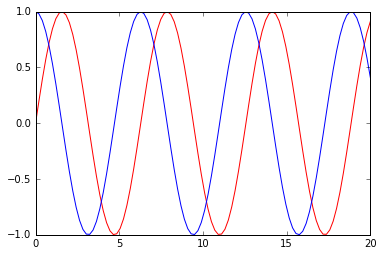

In [213]:
plt.plot(x,y1,'-r')
plt.plot(x,y2,'-b')

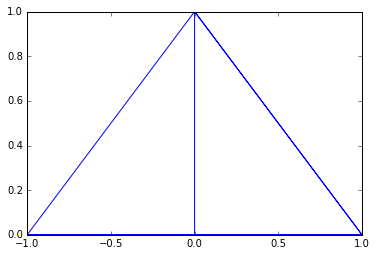

In [214]:
# A - B - C - A - D - B - C - D  # connect the vertices of a tetrahedron
x = np.array([-1,1,0,-1,0,1,0,0])
y = np.array([0,0,1,0,0,0,1,0])
z = np.array([0,0,0,0,1,0,0,1])
plt.plot(x,y)

In [215]:
a = 30         # a = angle between rotation (=z) axis and line-of-sight (degrees)
b = 40         # b = angle between east and projection of rotation (=z) axis on sky (degrees)
theta = 20     # theta = angle of rotation (degrees)

a = np.radians(a)
b = np.radians(b)
theta = np.radians(theta)
sina = np.sin(a)
sinb = np.sin(b)
cosa = np.cos(a)
cosb = np.cos(b)
sintheta = np.sin(theta)
costheta = np.cos(theta)

delta = 5     # delta is the angle between your eyes for the stereo projection (degrees)
delta = np.radians(delta)
sindelta = np.sin(delta)
cosdelta = np.cos(delta)

In [216]:
# rotate by angle theta around z-axis

xr = costheta*x + sintheta*y
yr = costheta*y + (-1)*sintheta*x
zr = z

# project rotated object onto the x,y,z axes

x1 = cosa*cosb*xr + sinb*yr + (-1)*sina*cosb*zr
y1 =-cosa*sinb*xr + cosb*yr + sina*sinb*zr
z1 = sina*xr + cosa*zr

# project rotated object onto the x',y',z' axes
# and separate the 2 views of the object in x

xd1 = cosdelta*x1 + sindelta*z1 + 1.5
yd1 = y1
zd1 = cosdelta*z1 + (-1)*sindelta*x1

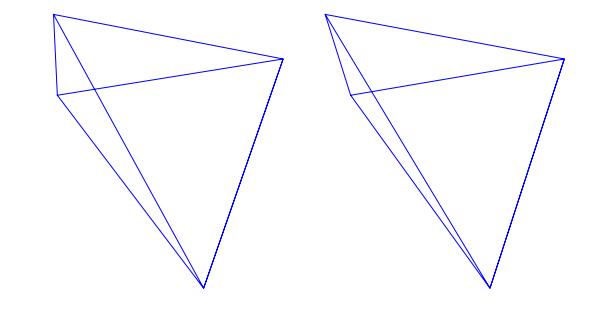

In [217]:
fig = plt.figure(figsize=(10,5))
plt.axis('off')
plt.plot(x1,y1,'-b')
plt.plot(xd1,yd1,'-b')

In [ ]:
%%ignore
for i in range(1000):
    theta = np.radians(i*0.02)
    sintheta = np.sin(theta)
    costheta = np.cos(theta)
    xr = costheta*x + sintheta*y
    yr = costheta*y + (-1)*sintheta*x

    # project rotated object onto the x,y,z axes

    x1 = cosa*cosb*xr + sinb*yr + (-1)*sina*cosb*zr
    y1 =-cosa*sinb*xr + cosb*yr + sina*sinb*zr
    z1 = sina*xr + cosa*zr

    # project rotated object onto the x',y',z' axes
    # and separate the 2 views of the object in x

    xd1 = cosdelta*x1 + sindelta*z1 + 1.5
    yd1 = y1
    zd1 = cosdelta*z1 + (-1)*sindelta*x1
    
    plt.plot(x1,y1,'-b')
    plt.plot(xd1,yd1,'-b')
    plt.show()
    time.sleep(0.01)